# Feature Engineering

Feature engineering is the process by which you enhance the input features. According to [Friedman (2001)](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf), 80% of the time spent on a predictive modeling project is **feature engineering**.

Feature Engineering consists of:
* **Feature Transformation**
* **Feature Creation**
* **Feature Selection**
* **Feature Extraction**

## Feature Transformation

Features in a dataset can have different scales and magnitudes. To improve model performance, we transform the features to have the same range of magnitude and have a specific distribution, e.g., a Gaussian distribution.

## Feature Creation

Feature creation involves deriving new features from existing ones. Different techniques can be used:
* Imputation: replacing missing values with sensible alternative instead of dropping
* Discretization or binning: transform numerical to categorical
* Categorical Encoding: transform categorical to numerical
* Feature Splitting: split one feature into multiple features
* ...

## Feature Selection
Feature Selection is the process of selecting a **subset of relevant features** for use in model construction. The goal of feature selection is to improve the accuracy of a model by reducing the complexity of a model and making it easier to interpret. There are many reasons why feature selection is important:

* **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy**: Less misleading data means modeling accuracy improves.
* **Reduces Training Time**: Less data means that algorithms train faster.
* **Improves Interpretability**: Fewer features means that the model is easier to explain.
* **Improves Generalization**: Fewer features means that the model is less likely to overfit.
* **Improves Robustness**: Fewer features means that the model is less likely to be affected by outliers.
* **Improves Stability**: Fewer features means that the model is less likely to be affected by small changes in the data.

### Determining feature relevance
How can we determine which features are **relevant**? There are many ways to do this,e.g.:
* using domain knowledge, maybe an expert in the field can tell us which features are important
* using statistical tests, e.g. correlation, chi-squared, or mutual information, ...
* using machine learning, e.g. using a decision tree or PCA to select the most important features
* using a combination of the above

Sci-kit learn provides a number of feature selection methods. You have to distinguish between regression and classification problems and each has number of different scoring functions.

The most common scoring functions for regression problems are:
* `f_regression`: computes the ANOVA F-value between the label/feature for regression tasks.
* `mutual_info_regression`: computes the mutual information between the target and the feature.

The most common scoring functions for classification are:
* `chi2`: computes the chi-squared stats between each non-negative feature and class.
* `f_classif`: computes the ANOVA F-value between the label/feature for classification tasks.
* `mutual_info_classif`: computes the mutual information between the target class and the feature.


Selecting the best features can be done using the `SelectKBest` class or the `SelectPercentile` class. The `SelectKBest` class selects the best features based on the `k` highest scores while the `SelectPercentile` class selects the best features based on a percentile of the highest scores. You can find more information about this classes [here](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

# Examples

The next few sections will demonstrate some feature engineering techniques. For more information look online.

## Dataset
We will use the Titanic dataset to demonstrate feature engineering. The dataset contains information about the passengers on the Titanic. We will use this dataset to predict whether a passenger survived or not.

In [8]:
# import titanic dataset
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature transformation

In [9]:
# standardize the Age and Fare features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S


## Feature Creation

The dataset contains missing values which we would like to replace with sensible alternatives.

In [10]:
pd.DataFrame(data.isna().sum(), columns=['# of missing values']).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
# of missing values,0,0,0,0,0,177,0,0,0,0,687,2


### Impute Missing Values

We will use a **Nearest Neighbors** imputer to impute the missing values in all the numerical columns. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) for more information.

In [11]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(data.select_dtypes(include=np.number))
X = pd.DataFrame(X, columns=data.select_dtypes(include=np.number).columns)

# replace all columns with imputed values
data[data.select_dtypes(include=np.number).columns] = X
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,-0.530377,1.0,0.0,A/5 21171,-0.502445,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1.0,0.0,PC 17599,0.786845,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,-0.254825,0.0,0.0,STON/O2. 3101282,-0.488854,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1.0,0.0,113803,0.420730,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,0.365167,0.0,0.0,373450,-0.486337,NaN,S


Categorical columns **are not imputed** by the KNN imputer. We will impute the missing values in the categorical columns with the most frequent value using the SimpleImputer. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) for more information.

However, one can also use the KNN imputer to impute categorical columns, but it requires that all categorical columns are encoded as integers using e.g. a LabelEncoder, since the KNN imputer only works with numerical columns.  See [here](https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline) for more information.

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(data.select_dtypes(include='object'))
X = pd.DataFrame(X, columns=data.select_dtypes(include='object').columns)

# replace all columns with imputed values
data[data.select_dtypes(include='object').columns] = X
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,-0.530377,1.0,0.0,A/5 21171,-0.502445,B96 B98,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1.0,0.0,PC 17599,0.786845,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,-0.254825,0.0,0.0,STON/O2. 3101282,-0.488854,B96 B98,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1.0,0.0,113803,0.420730,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,0.365167,0.0,0.0,373450,-0.486337,B96 B98,S


In [6]:
# fix data types since imputation changes them
data = data.astype({'Sex': 'category',
                    'Survived': 'category',
                    'Cabin': 'category',
                    'Embarked': 'category'})
# check for any missing values in the dataset
data.isnull().sum().sum()

0

 ### Discretization or Binning

Simple example of discretization using Pandas cut function. See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for more information.

In [13]:
import pandas as pd
import numpy as np

pd.cut(data['Fare'], bins=3).value_counts()

(-0.659, 2.79]    871
(2.79, 6.229]      17
(6.229, 9.667]      3
Name: Fare, dtype: int64

## Feature Selection

To illustrate feature selection we will compute the chi-squared statistic for the Sex and Survived columns and PClass and Survived columns. We'll begin by creating contingency tables for both variables.

As learned in previous courses the χ² - statistic is defined as:
$\chi^2 = \sum_{i} \frac{(E_i - O_i)^2}{E_i}$

### Manual Computation of χ² - value

We will compute the chi-squared statistic manually using the contingency tables.

In [14]:
O = pd.crosstab(data.Sex, data.Survived)
# pandas set precision
pd.crosstab(data.Sex, data.Survived, margins=True)

Survived,0.0,1.0,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


The probability of survival for a passenger is $342/891 = 38.38\%$
The total of female passengers is 314, and that of male passengers is 577.

So, based on the above probability we would expect:
 * $314 \cdot 342/891 = 120.5$ female passenger to survive and
 * $577 \cdot 342/891 = 221.5$ male passengers to survive.

An analog calculation can be done for not surviving. With some data manipulation we can compute the expected counts using Numpy.

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
E = pd.DataFrame(
    np.reshape(
        np.tile(data.Sex.value_counts().sort_index().to_numpy(), 2) *
        np.repeat(pd.crosstab(data.Sex, data.Survived, margins=True, normalize=True).loc['All'].to_numpy()[:2], 2),
        (2, -1)),
    columns=['female', 'male']).T
E.index.name = 'Sex'
E.columns.name = 'Survived'
E

Survived,0,1
Sex,,
female,193.47,120.53
male,355.53,221.47


Compute $\frac{(E_i - O_i)^2}{E_i}$ for every combination of `Sex` and `Survived`.

In [17]:
(E - O) ** 2 / E

Survived,0,1
Sex,,
female,65.39,104.96
male,35.58,57.12


We now compute the χ²-value for the `Sex` feature in relation to the `Survived` feature by summing all values.

A χ²-value of $0$ means the variables `Sex` and `Survived` are completely independent. In other words: if the expected values and observed values are the same there is no influence of `Sex` on `Survived`. This is clearly not the case in the distaster that struck Titanic. We know that female passenger were saved more than to be expected. 'Women and children first!'

In [18]:
χ = ((E - O) ** 2 / E).to_numpy().sum()
print(f'χ² = {χ:.2f}')

χ² = 263.05


### Computute χ² - value using Scikit-Learn

Let's compute the χ² using Sci-kit learn `chi2`-function and compare that value to our own value.

In [41]:
from sklearn.feature_selection import chi2

X = pd.get_dummies(data.Sex)  # encode data in one-hot encoding
y = data.Survived
pd.DataFrame(chi2(X, y), index=['χ²', 'p-value'], columns=X.columns).sum(axis=1)

χ²        263.05
p-value     0.00
dtype: float64

Do the same for the `Pclass` feature and compare it to the `Sex` feature.

In [40]:
X = pd.get_dummies(data.Pclass)
y = data.Survived
pd.DataFrame(chi2(X, y), index=['χ²', 'p-value'], columns=X.columns).sum(axis=1)

χ²        102.89
p-value     0.01
dtype: float64

### Manual computation of F-value
See https://timeseriesreasoning.com/contents/f-test-for-regression-analysis/ for more information.

In [169]:
from sklearn.linear_model import LinearRegression

X = data[['Age']]
y = data.Fare

# standardize data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# remove outliers using standard deviation
X = X[(np.abs(y - y.mean()) <= (3 * y.std()))]
y = y[(np.abs(y - y.mean()) <= (3 * y.std()))]

# model 1
k1 = 1
y_hat = np.mean(y)
RSS_1 = np.sum((y - y_hat) ** 2)
# model 2
model = LinearRegression()
model.fit(X, y)
k2 = 2
y_hat = model.predict(X)
RSS_2 = np.sum((y - y_hat) ** 2)

N = len(y)

# compute F-value
F = ((RSS_1 - RSS_2) / (k2 - k1)) / (RSS_2 / (N - k2))
print('model 1: y_hat = {:.2f}'.format(y_hat.mean()))
print('model 2: y_hat = {:.2f} + {:.2f} * x'.format(model.intercept_, model.coef_[0]))
print(f'RSS_1 = {RSS_1:.2f}, RSS_2 = {RSS_2:.2f}, F = {F:.2f}, N = {N}, k1 = {k1}, k2 = {k2}')

model 1: y_hat = -0.11
model 2: y_hat = -0.11 + 0.08 * x
RSS_1 = 303.51, RSS_2 = 297.85, F = 16.52, N = 871, k1 = 1, k2 = 2


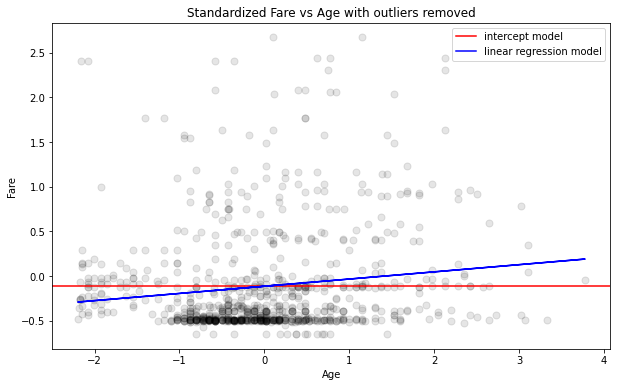

In [165]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, color='black', marker='o', s=50, alpha=0.1)
ax.axhline(np.mean(y), color='r', label='intercept model')
ax.plot(X, y_hat, color='b', label='linear regression model')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend()
_ = ax.set_title('Standardized Fare vs Age with outliers removed')

### Compute F-value using Scikit-Learn

In [170]:

# compute F-value using Sci-kit learn
from sklearn.feature_selection import f_regression

X = data[['Age']]
y = data.Fare

# standardize data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# remove outliers using standard deviation
X = X[(np.abs(y - y.mean()) <= (3 * y.std()))]
y = y[(np.abs(y - y.mean()) <= (3 * y.std()))]

f_regression(X, y)
# or f_classify(X, y) if y is categorical

(array([16.52432203]), array([5.23852205e-05]))

In [172]:
X = data[['Pclass']]
y = data.Fare

# standardize data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# remove outliers using standard deviation
X = X[(np.abs(y - y.mean()) <= (3 * y.std()))]
y = y[(np.abs(y - y.mean()) <= (3 * y.std()))]

f_regression(X, y)

(array([646.87154422]), array([4.19604346e-107]))

Comparing both F-values we see that the F-value for `Sex` is higher than that of `Pclass` which means one would prefer the `Sex` feature over the `Pclass` feature.

Using the following code we can select the features in the top 40% of the F-values.


In [91]:
from sklearn.feature_selection import f_regression, SelectPercentile

data_copy = data.copy()

# replace all categorical columns with categorical codes
for col in data_copy.drop(columns=['Survived']).select_dtypes(include='category').columns:
    data_copy[col] = data_copy[col].cat.codes

# Select the 5 best features
selector = SelectPercentile(score_func=f_regression, percentile=40)
X = selector.fit_transform(data_copy.select_dtypes(include=np.number), data_copy.Survived)
best_features = selector.get_support(indices=True)
data_copy.select_dtypes(include=np.number).iloc[:, best_features].head()


,Pclass,Sex,Fare,Cabin
0,3,1,7,47
1,1,0,71,81
2,3,0,8,47
3,1,0,53,55
4,3,1,8,47
